# tokenizer implement

In [1]:
import tiktoken

# Get the tokenizer for the GPT-4 family of models
# This includes gpt-4, gpt-3.5-turbo, etc.
enc = tiktoken.get_encoding("cl100k_base")

# A sample text to tokenize
text_to_tokenize = "I am a transformer"

# Tokenize the text. This returns a list of token IDs (integers).
tokens = enc.encode(text_to_tokenize)

# Print the token IDs
print("Token IDs:", tokens)

# Print the number of tokens
print("Number of tokens:", len(tokens))

# Decode the tokens back into a string to verify
decoded_text = enc.decode(tokens)

# Print the decoded text
print("Decoded text:", decoded_text)

Token IDs: [40, 1097, 264, 43678]
Number of tokens: 4
Decoded text: I am a transformer


# positional encoding implement from scratch

In [2]:
import torch
import torch.nn as nn
import math

In [3]:
max_len = 10
d_model = 4
pe = torch.zeros(max_len, d_model)
print("pe", pe)
print("pe", pe.shape)

pe tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
pe torch.Size([10, 4])


In [4]:
# Create a tensor representing positions (0, 1, 2, ..., max_len-1)
position = torch.arange(0, max_len, dtype=torch.float)
position

tensor([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [5]:
position = position.unsqueeze(1)
position

tensor([[0.],
        [1.],
        [2.],
        [3.],
        [4.],
        [5.],
        [6.],
        [7.],
        [8.],
        [9.]])

In [6]:
position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
position

tensor([[0.],
        [1.],
        [2.],
        [3.],
        [4.],
        [5.],
        [6.],
        [7.],
        [8.],
        [9.]])

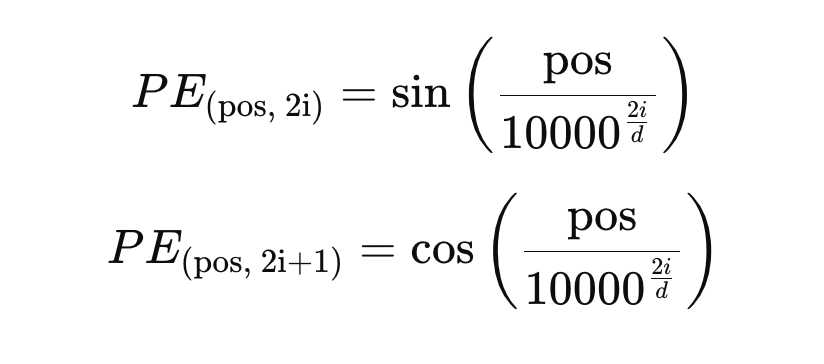

In [7]:
torch.arange(0, d_model, 2).float()

tensor([0., 2.])

In [8]:
torch.arange(0, d_model, 2).float()/d_model

tensor([0.0000, 0.5000])

In [9]:
# 10000 ^ ab = e ^ ( ab * ln (10000) )
log_val = math.log(10000.0) # 10000
pos_val = torch.arange(0, d_model, 2).float()/d_model # 2i / d part 

In [10]:
div_term = log_val * pos_val
div_term

tensor([0.0000, 4.6052])

In [11]:
pe.shape

torch.Size([10, 4])

In [12]:
pe[:, 0::2].shape

torch.Size([10, 2])

In [13]:
# Apply sine to even indices and cosine to odd indices
# compute pe for even and odd and add it to the input x
pe = torch.zeros(max_len, d_model)
pe[:, 0::2] = torch.sin(position * div_term)
# 0  2  4  6 
pe

tensor([[ 0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000, -0.9943,  0.0000],
        [ 0.0000,  0.0000,  0.2128,  0.0000],
        [ 0.0000,  0.0000,  0.9487,  0.0000],
        [ 0.0000,  0.0000, -0.4158,  0.0000],
        [ 0.0000,  0.0000, -0.8597,  0.0000],
        [ 0.0000,  0.0000,  0.5998,  0.0000],
        [ 0.0000,  0.0000,  0.7313,  0.0000],
        [ 0.0000,  0.0000, -0.7564,  0.0000],
        [ 0.0000,  0.0000, -0.5694,  0.0000]])

In [14]:
pe = torch.zeros(max_len, d_model)
pe[:, 1::2] = torch.cos(position * div_term)
# 1  3  5  7
pe

tensor([[ 0.0000,  1.0000,  0.0000,  1.0000],
        [ 0.0000,  1.0000,  0.0000, -0.1070],
        [ 0.0000,  1.0000,  0.0000, -0.9771],
        [ 0.0000,  1.0000,  0.0000,  0.3161],
        [ 0.0000,  1.0000,  0.0000,  0.9094],
        [ 0.0000,  1.0000,  0.0000, -0.5108],
        [ 0.0000,  1.0000,  0.0000, -0.8001],
        [ 0.0000,  1.0000,  0.0000,  0.6820],
        [ 0.0000,  1.0000,  0.0000,  0.6541],
        [ 0.0000,  1.0000,  0.0000, -0.8220]])

In [15]:
pe = torch.zeros(max_len, d_model)
pe[:, 0::2] = torch.sin(position * div_term)
pe[:, 1::2] = torch.cos(position * div_term)
pe

tensor([[ 0.0000,  1.0000,  0.0000,  1.0000],
        [ 0.0000,  1.0000, -0.9943, -0.1070],
        [ 0.0000,  1.0000,  0.2128, -0.9771],
        [ 0.0000,  1.0000,  0.9487,  0.3161],
        [ 0.0000,  1.0000, -0.4158,  0.9094],
        [ 0.0000,  1.0000, -0.8597, -0.5108],
        [ 0.0000,  1.0000,  0.5998, -0.8001],
        [ 0.0000,  1.0000,  0.7313,  0.6820],
        [ 0.0000,  1.0000, -0.7564,  0.6541],
        [ 0.0000,  1.0000, -0.5694, -0.8220]])

In [16]:
# add additional dim to be able to add to batch
pe.unsqueeze(0)

tensor([[[ 0.0000,  1.0000,  0.0000,  1.0000],
         [ 0.0000,  1.0000, -0.9943, -0.1070],
         [ 0.0000,  1.0000,  0.2128, -0.9771],
         [ 0.0000,  1.0000,  0.9487,  0.3161],
         [ 0.0000,  1.0000, -0.4158,  0.9094],
         [ 0.0000,  1.0000, -0.8597, -0.5108],
         [ 0.0000,  1.0000,  0.5998, -0.8001],
         [ 0.0000,  1.0000,  0.7313,  0.6820],
         [ 0.0000,  1.0000, -0.7564,  0.6541],
         [ 0.0000,  1.0000, -0.5694, -0.8220]]])

In [17]:
pe = pe.unsqueeze(0)
pe

tensor([[[ 0.0000,  1.0000,  0.0000,  1.0000],
         [ 0.0000,  1.0000, -0.9943, -0.1070],
         [ 0.0000,  1.0000,  0.2128, -0.9771],
         [ 0.0000,  1.0000,  0.9487,  0.3161],
         [ 0.0000,  1.0000, -0.4158,  0.9094],
         [ 0.0000,  1.0000, -0.8597, -0.5108],
         [ 0.0000,  1.0000,  0.5998, -0.8001],
         [ 0.0000,  1.0000,  0.7313,  0.6820],
         [ 0.0000,  1.0000, -0.7564,  0.6541],
         [ 0.0000,  1.0000, -0.5694, -0.8220]]])

In [18]:
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=5000):
        super(PositionalEncoding, self).__init__()
        
        # create zero tensor
        pe = torch.zeros(max_len, d_model)
        
        # create tensor representing position
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        
        # 10000 ^ ab = e ^ ( ab * ln (10000) )
        log_val = math.log(10000.0) # 10000
        pos_val = torch.arange(0, d_model, 2).float()/d_model # 2i / d part 
        div_term = log_val * pos_val
            
        # Apply sine to even indices and cosine to odd indices
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        
        # Add an extra dimension to `pe` so it can be added to a batch of tensors
        pe = pe.unsqueeze(0)
        
        # Register the positional encoding tensor as a buffer. This means it's part
        # of the model's state but is not a trainable parameter.
        self.register_buffer('pe', pe)

    def forward(self, x):
        # x: This is your input tensor, which holds the token embeddings. 
        # Its shape is (batch_size, sequence_length, d_model)
        # x.size(1): This method returns the size of the tensor along the first 
        # dimension (index 1). In this case, that's the sequence_length. So, if you 
        # have a sequence of 10 tokens, x.size(1) will be 10.
        x = x + self.pe[:, :x.size(1), :]
        return x

In [19]:
# embedding
vocab_size = 6
torch.manual_seed(0)
embedding_layer = nn.Embedding(vocab_size, d_model)
print(embedding_layer.weight)

Parameter containing:
tensor([[-1.1258, -1.1524, -0.2506, -0.4339],
        [ 0.8487,  0.6920, -0.3160, -2.1152],
        [ 0.4681, -0.1577,  1.4437,  0.2660],
        [ 0.1665,  0.8744, -0.1435, -0.1116],
        [ 0.9318,  1.2590,  2.0050,  0.0537],
        [ 0.6181, -0.4128, -0.8411, -2.3160]], requires_grad=True)


In [20]:
tokenizer = tiktoken.get_encoding("cl100k_base")

In [21]:
tokenized_text = torch.tensor(tokenizer.encode("I am a transformer"))
tokenized_text

tensor([   40,  1097,   264, 43678])

In [22]:
# for demo
tokenized_text = torch.where(tokenized_text>vocab_size,vocab_size-1,tokenized_text)

In [23]:
embedding_layer(tokenized_text)

tensor([[ 0.6181, -0.4128, -0.8411, -2.3160],
        [ 0.6181, -0.4128, -0.8411, -2.3160],
        [ 0.6181, -0.4128, -0.8411, -2.3160],
        [ 0.6181, -0.4128, -0.8411, -2.3160]], grad_fn=<EmbeddingBackward0>)

In [24]:
tokenized_text = tokenizer.encode("I am a transformer model")
tokenized_text = tokenized_text + [0] * (max_len - len(tokenized_text))
tokenized_text = torch.tensor(tokenized_text).unsqueeze(0)
torch.manual_seed(0)
embedding_layer = nn.Embedding(tokenizer.n_vocab, d_model)
input_embeddings  = embedding_layer(tokenized_text)
input_embeddings 

tensor([[[ 0.9671, -0.9911,  0.3016, -0.1073],
         [ 0.1119,  0.2238,  0.7932,  0.2186],
         [-0.5619,  0.6640, -2.1033,  0.8777],
         [ 1.2386,  1.2135,  1.1324,  0.4324],
         [ 0.5332,  0.1562,  0.2335,  2.0255],
         [-1.1258, -1.1524, -0.2506, -0.4339],
         [-1.1258, -1.1524, -0.2506, -0.4339],
         [-1.1258, -1.1524, -0.2506, -0.4339],
         [-1.1258, -1.1524, -0.2506, -0.4339],
         [-1.1258, -1.1524, -0.2506, -0.4339]]], grad_fn=<EmbeddingBackward0>)

In [25]:
pe.shape

torch.Size([1, 10, 4])

In [26]:
input_embeddings.shape

torch.Size([1, 10, 4])

In [27]:
pos_encoder = PositionalEncoding(d_model)
output_with_pos_embeddings = pos_encoder(input_embeddings)
output_with_pos_embeddings

tensor([[[ 0.9671,  0.0089,  0.3016,  0.8927],
         [ 0.1119,  1.2238, -0.2010,  0.1116],
         [-0.5619,  1.6640, -1.8905, -0.0994],
         [ 1.2386,  2.2135,  2.0811,  0.7485],
         [ 0.5332,  1.1562, -0.1823,  2.9350],
         [-1.1258, -0.1524, -1.1103, -0.9447],
         [-1.1258, -0.1524,  0.3493, -1.2340],
         [-1.1258, -0.1524,  0.4807,  0.2481],
         [-1.1258, -0.1524, -1.0070,  0.2203],
         [-1.1258, -0.1524, -0.8200, -1.2559]]], grad_fn=<AddBackward0>)

In [28]:
output_with_pos_embeddings.shape

torch.Size([1, 10, 4])

In [1]:
from gpt import GPT, tokenizer
tokenizer = tokenizer   
d_model, max_len = 4, 12
model = GPT(d_model=d_model, max_len=max_len, tokenizer=tokenizer)
model("I am a transformer model")

tensor([[[ 0.9671,  0.0089,  0.3016,  0.8927],
         [ 0.1119,  1.2238, -0.2010,  0.1116],
         [-0.5619,  1.6640, -1.8905, -0.0994],
         [ 1.2386,  2.2135,  2.0811,  0.7485],
         [ 0.5332,  1.1562, -0.1823,  2.9350],
         [-0.3007,  0.6248, -0.4825, -0.6517],
         [-0.3007,  0.6248,  0.9770, -0.9410],
         [-0.3007,  0.6248,  1.1085,  0.5411],
         [-0.3007,  0.6248, -0.3792,  0.5132],
         [-0.3007,  0.6248, -0.1922, -0.9630],
         [-0.3007,  0.6248,  1.2554, -0.6191],
         [-0.3007,  0.6248,  0.7587,  0.7835]]], grad_fn=<AddBackward0>)

In [2]:
from gpt import GPT, tokenizer
tokenizer = tokenizer   
d_model, max_len = 4, 12
model = GPT(d_model=d_model, max_len=max_len, tokenizer=tokenizer)
model("I am a transformer model")

tensor([[[ 0.9671,  0.0089,  0.3016,  0.8927],
         [ 0.1119,  1.2238, -0.2010,  0.1116],
         [-0.5619,  1.6640, -1.8905, -0.0994],
         [ 1.2386,  2.2135,  2.0811,  0.7485],
         [ 0.5332,  1.1562, -0.1823,  2.9350],
         [-0.3007,  0.6248, -0.4825, -0.6517],
         [-0.3007,  0.6248,  0.9770, -0.9410],
         [-0.3007,  0.6248,  1.1085,  0.5411],
         [-0.3007,  0.6248, -0.3792,  0.5132],
         [-0.3007,  0.6248, -0.1922, -0.9630],
         [-0.3007,  0.6248,  1.2554, -0.6191],
         [-0.3007,  0.6248,  0.7587,  0.7835]]], grad_fn=<AddBackward0>)

In [10]:
tokenizer.encode("####")

[827]

tensor([[[ 0.0355,  1.3881, -0.0126,  1.4887],
         [ 0.9704, -0.7387, -1.2172, -0.6782],
         [-0.4355,  1.3424,  2.2645, -0.5238],
         [ 0.6746,  1.3979,  0.7446,  0.8990],
         [ 1.7403,  0.7568,  0.3252,  1.4754],
         [ 0.2910,  1.9604, -1.2905,  0.2801],
         [ 0.2910,  1.9604,  0.1691, -0.0092],
         [ 0.2910,  1.9604,  0.3006,  1.4729],
         [ 0.2910,  1.9604, -1.1871,  1.4450],
         [ 0.2910,  1.9604, -1.0002, -0.0312],
         [ 0.2910,  1.9604,  0.4475,  0.3127],
         [ 0.2910,  1.9604, -0.0493,  1.7152]]], grad_fn=<AddBackward0>)